In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_generators.basic_generator import BasicDataGenerator

In [2]:
data_gen = BasicDataGenerator(filename='src/basic001.json')
categories = ["C1", "C2", "C3"]

### Prices, bids, margins ... 

In [3]:
prices = data_gen.get_prices()
bids = data_gen.get_bids()
margins = data_gen.get_margins()
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')

prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
margins=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


### Class distributions
#### Convertion rates

In [4]:
help(data_gen.get_conversion_rates)

Help on method get_conversion_rates in module data_generators.basic_generator:

get_conversion_rates(mode='all') method of data_generators.basic_generator.BasicDataGenerator instance
    Get the conversion rates distribution. The output depends on the `mode` kwarg.
    [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]



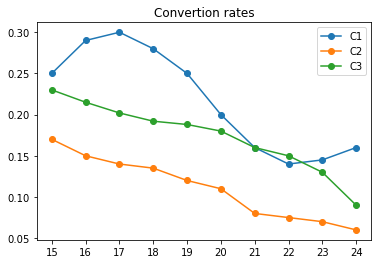

In [5]:
conv_rates = data_gen.get_conversion_rates()

plt.figure()
plt.xticks(prices)
for i in range(0,len(conv_rates)):
    plt.plot(prices, conv_rates[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Convertion rates")
plt.show()

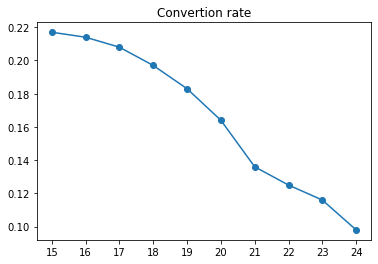

In [6]:
aggr_conv_rate = data_gen.get_conversion_rates(mode='aggregate')
plt.figure()
plt.xticks(prices)
plt.plot(prices, aggr_conv_rate, '-o')    
plt.title("Convertion rate")
plt.show()

In [7]:
print(f'{aggr_conv_rate=}')

aggr_conv_rate=array([0.217, 0.214, 0.208, 0.197, 0.183, 0.164, 0.136, 0.125, 0.116,
       0.098])


#### Daily clicks

In [8]:
help(data_gen.get_daily_clicks)

Help on method get_daily_clicks in module data_generators.basic_generator:

get_daily_clicks(mode='all') method of data_generators.basic_generator.BasicDataGenerator instance
            Get the distribution probability over the number of daily clicks with respect to the bid of the advertisement 
            campaign given the price.
            
    The output depends on the `mode` kwarg.
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: `upper_bound` * (1.0 - exp(-1 * `speed_factor` * `bids`))



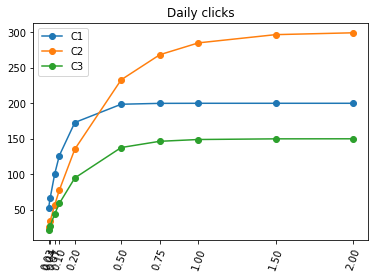

In [9]:
daily_clicks = data_gen.get_daily_clicks()

plt.figure()
plt.xticks(bids, rotation = 70)

for i in range(0,len(daily_clicks)):
    plt.plot(bids, daily_clicks[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Daily clicks")
plt.show()

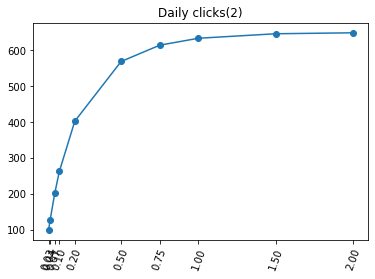

In [10]:
aggr_daily_click = data_gen.get_daily_clicks(mode='aggregate')
plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids, aggr_daily_click, '-o')    
plt.title("Daily clicks(2)")
plt.show()

In [11]:
print(f'{aggr_daily_click=}')

aggr_daily_click=array([ 98.551, 127.05 , 201.804, 263.199, 403.108, 569.401, 614.742,
       634.044, 646.584, 649.25 ])


#### Costs per click

In [12]:
help(data_gen.get_costs_per_click)

Help on method get_costs_per_click in module data_generators.basic_generator:

get_costs_per_click(mode='all') method of data_generators.basic_generator.BasicDataGenerator instance
            Get the distribution probability over the cost per click as a function of the bid
            
    The output depends on the `mode` kwarg.
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: `coefficient` * log(1 + `bids`/`coefficient`)



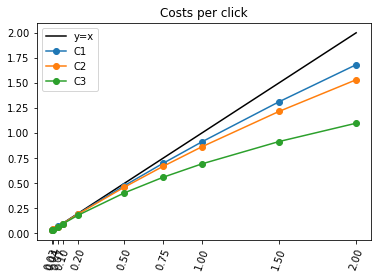

In [13]:
costs = data_gen.get_costs_per_click()

plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids,bids, color='black', label="y=x")
for i in range(0,len(costs)):
    plt.plot(bids, costs[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Costs per click")
plt.show()

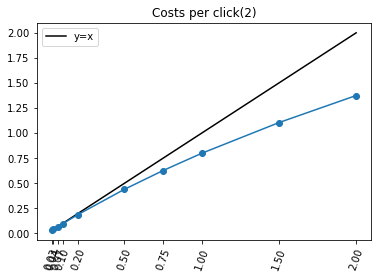

In [14]:
aggr_costs = data_gen.get_costs_per_click(mode='aggregate')
plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids,bids, color='black', label="y=x")
plt.plot(bids, aggr_costs, '-o')
plt.legend(loc='best')
plt.title("Costs per click(2)")
plt.show()

In [15]:
print(f'{aggr_costs=}')

aggr_costs=array([0.03 , 0.04 , 0.069, 0.097, 0.189, 0.44 , 0.627, 0.799, 1.105,
       1.375])


#### Future purchases

In [16]:
help(data_gen.get_future_purchases)

Help on method get_future_purchases in module data_generators.basic_generator:

get_future_purchases(mode='all') method of data_generators.basic_generator.BasicDataGenerator instance
            Get the distribution probability over the number of times the user will come back to the
            ecommerce website to buy another consumable item by 30 days after the first purchase (at the same price).
    
            The output depends on the `mode` kwarg.
    
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: np.maximum('lower_bound', 'coefficient'*(- prices + min(prices)) + 'upper_bound')



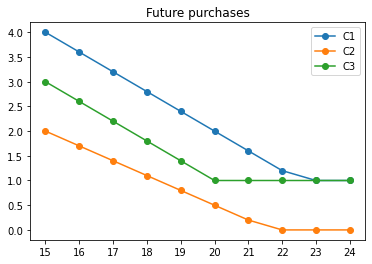

In [17]:
next_purch = data_gen.get_future_purchases()

plt.figure()
plt.xticks(prices)
for i in range(0,len(next_purch)):
    plt.plot(prices, next_purch[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Future purchases")

plt.show()

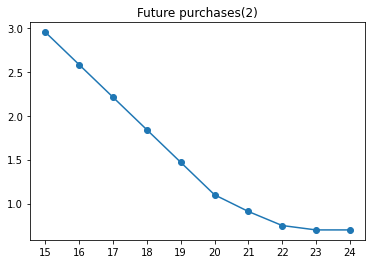

In [18]:
aggr_purch = data_gen.get_future_purchases(mode='aggregate')
plt.figure()
plt.xticks(prices)
plt.plot(prices, aggr_purch, '-o')
plt.title("Future purchases(2)")
plt.show()